# Image classification - The multi-class weather dataset
## Table of Contents

**Task 1 - Data exploration, preparation, and partition**

1.1 - Data partition
   - 1.1.1 - Import libraries and defining functions for task 1.1
   - 1.1.2 - Loading the dataset and creating a dataframe
   - 1.1.3 - Splitting the dataset
   - 1.1.4 - Saving the partitions to CSV files
   - 1.1.5 - Displaying partition information
   - 1.1.6 - Observations on data partitioning

1.2 - Preprocessing and preparation
   - 1.2.1 - Import libraries and define constants
   - 1.2.2 - Define functions for image processing and CSV parsing
   - 1.2.3 - Create datasets from CSV files
   - 1.2.4 - Dataset integrity inspection
   - 1.2.5 - Comments on Dataset Inspection

**Task 2 - A simple classifier**

2.1 First classifier
   - 2.1.1 - Import libraries and set reproducibility settings
   - 2.1.2 - Build and compile the model
   - 2.1.3 - Set up early stopping callback
   - 2.1.4 - Train the model
   - 2.1.5 - Evaluate the model

2.2 A more complex classifier
   - 2.2.1 - Import libraries and set reproducibility settings
   - 2.2.2 - Define Functions for Data Preprocessing
   - 2.2.3 - Hyperparameter tuning and Model training
   - 2.2.4 - Explain and justify my decision choices made in this task

2.3 Error Analysis

**Task 3 - A more complex classifier**

3.1 Using ConvNet

3.2 Using pre-trained models

3.3 Comparative evaluation
   - 3.3.1 - What system (including the systems you developed in Task 2) perform best on the test set?
   - 3.3.2 - Report the accuracy of best system on each of the different weather categories. What type of weather was most difficult to detect?
---

## Task 1 - Data exploration, preparation, and partition 
### 1.1 - Data partition

**1.1.1 - Import libraries and defining functions for task 1.1:**

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def get_label_from_filepath(filepath):
    """
    Extracts the label from the image filepath.
    Assumes the label is the part of the filename before any digits or extension.
    Example: 'dataset2/shine10.jpg' -> 'shine'
    """
    filename = os.path.basename(filepath)  # Get the filename from the filepath
    label = ''.join(filter(str.isalpha, filename.split('.')[0]))  # Extract the label
    return label

def show_partition_details(df, partition_name):
    """
    Prints the distribution of labels and the first 10 entries of a dataset partition.
    """
    print(f"Distribution of labels in {partition_name}:")
    print(df['Label'].value_counts(normalize=True))
    print(f"\nFirst 10 entries of {partition_name}:")
    print(df.head(10))

C:\MQU\SCI\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**1.1.2 - Loading the dataset and creating a dataframe:** 

In [2]:
# Get the list of image file paths
file_paths = [os.path.join('dataset2', file) for file in os.listdir('dataset2') if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Create a DataFrame with file paths
data = pd.DataFrame({'Filepath': file_paths})

# Apply the label extraction function to the 'Filepath' column to create a new 'Label' column
data['Label'] = data['Filepath'].apply(get_label_from_filepath)

**1.1.3 - Splitting the dataset:**

In [3]:
# Divide the dataset: 70% for training, 20% for testing, 10% for validation
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Label'])
train_df, val_df = train_test_split(train_df, test_size=0.125, random_state=42, stratify=train_df['Label'])  # 0.125 * 0.8 = 0.1

# Randomize the order of the partitions
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
val_df = val_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

**1.1.4 - Saving the partitions to CSV files:**

In [4]:
# Write the partitions to CSV files without headers
train_df.to_csv('my_training.csv', index=False, header=False)
val_df.to_csv('my_validation.csv', index=False, header=False)
test_df.to_csv('my_test.csv', index=False, header=False)

**1.1.5 - Displaying partition information:**

In [5]:
# Present details about each partition of the dataset
show_partition_details(train_df, 'Training Set')
show_partition_details(val_df, 'Validation Set')
show_partition_details(test_df, 'Test Set')

Distribution of labels in Training Set:
sunrise    0.317662
cloudy     0.266836
shine      0.224905
rain       0.190597
Name: Label, dtype: float64

First 10 entries of Training Set:
                  Filepath    Label
0  dataset2\sunrise309.jpg  sunrise
1     dataset2\shine10.jpg    shine
2    dataset2\cloudy17.jpg   cloudy
3      dataset2\rain97.jpg     rain
4     dataset2\rain106.jpg     rain
5    dataset2\cloudy15.jpg   cloudy
6     dataset2\rain165.jpg     rain
7    dataset2\shine245.jpg    shine
8    dataset2\shine122.jpg    shine
9  dataset2\sunrise244.jpg  sunrise
Distribution of labels in Validation Set:
sunrise    0.318584
cloudy     0.265487
shine      0.221239
rain       0.194690
Name: Label, dtype: float64

First 10 entries of Validation Set:
                  Filepath    Label
0    dataset2\shine243.jpg    shine
1   dataset2\cloudy288.jpg   cloudy
2   dataset2\cloudy154.jpg   cloudy
3  dataset2\sunrise157.jpg  sunrise
4     dataset2\rain160.jpg     rain
5  dataset2\sunris

**1.1.6 - Observations on data partitioning:**

- The label distribution in the Training Set shows a relatively balanced split among the different weather conditions.
- Sunrise has the highest proportion, followed by cloudy, shine, and rain. This balance is important for training a well-generalized model.

- The first 10 entries of the Training Set are displayed to provide a quick glance at the data. It includes a mix of all weather conditions, which is a good sign of randomization in the dataset partition.

- Similar observations can be made for the Validation and Test Sets.
- The label distribution is consistent with the Training Set, indicating that the stratified split was successful.
- The first 10 entries of each set show a diverse set of images, which is crucial for evaluating the model's performance across different conditions.

### 1.2 - Preprocessing and preparation

**1.2.1 - Import libraries and define constants:**

In [6]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Constants for image dimensions and class names
IMG_HEIGHT = 230
IMG_WIDTH = 230
IMG_CHANNELS = 3
CLASS_NAMES = ["cloudy", "sunrise", "rain", "shine"]

**1.2.2 - Define functions for image processing and CSV parsing:**

In [7]:
def process_image(filepath):
    """
    Reads an image from a given path, decodes it into a dense tensor, and resizes it
    to a fixed shape.
    
    Args:
    filepath: A `Tensor` of type `string` representing the path of the image file.

    Returns:
    A tensor representing the processed image.
    """
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=IMG_CHANNELS)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = tf.cast(image, tf.float32) / 255.0  # Ensure image is float32 and normalize
    return image


def parse_csv_line(csv_row):
    """
    Parses a line from a CSV file.

    Args:
    csv_row: A `Tensor` of type `string` representing a line from a CSV file.

    Returns:
    A tuple (image, label) where image is a processed image tensor and label is
    the corresponding label index.
    """
    record_defaults = ["path", "weather"]
    filepath, label_str = tf.io.decode_csv(csv_row, record_defaults)
    image = process_image(filepath)
    label_index = tf.argmax(tf.math.equal(CLASS_NAMES, label_str))  # Convert string label to index
    return image, label_index

**1.2.3 - Create datasets from CSV files:**

In [8]:
def create_dataset(csv_file, batch_size):
    """
    Creates a dataset from a CSV file.

    Args:
    csv_file: A `string` representing the path to the CSV file.
    batch_size: An `int` representing the batch size.

    Returns:
    A `tf.data.Dataset` object.
    """
    dataset = (tf.data.TextLineDataset(csv_file)
               .map(parse_csv_line)
               .batch(batch_size))
    return dataset

# Load the datasets
train_ds = create_dataset("training.csv", batch_size=32)
validation_ds = create_dataset("validation.csv", batch_size=32)
test_ds = create_dataset("test.csv", batch_size=32)

**1.2.4 - Dataset integrity inspection:**

In [9]:
def inspect_dataset(dataset, dataset_name):
    """
    Inspects a dataset to ensure that each image has the correct dimensions
    and normalized pixel values.
    
    Args:
    dataset (tf.data.Dataset): The dataset to inspect.
    dataset_name (str): The name of the dataset for logging purposes.
    """
    print(f"Inspecting {dataset_name}...")
    
    for images, labels in dataset.take(1):  # Take 1 batch of images and labels
        for i, image in enumerate(images):
            # Check if the image has the expected shape and number of channels
            if image.shape != (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
                print(f"Error: Image {i} in {dataset_name} has incorrect dimensions {image.shape}.")
            
            # Check if the pixel values are normalized between 0 and 1
            min_pixel, max_pixel = tf.reduce_min(image), tf.reduce_max(image)
            if min_pixel < 0.0 or max_pixel > 1.0:
                print(f"Error: Image {i} in {dataset_name} has pixel values outside the range [0, 1].")
    
    print(f"Inspection completed for {dataset_name}.")

# Run the inspection on the datasets
inspect_dataset(train_ds, "Training Dataset")
inspect_dataset(validation_ds, "Validation Dataset")
inspect_dataset(test_ds, "Test Dataset")

Inspecting Training Dataset...
Inspection completed for Training Dataset.
Inspecting Validation Dataset...
Inspection completed for Validation Dataset.
Inspecting Test Dataset...
Inspection completed for Test Dataset.


**1.2.5 - Comments on Dataset Inspection:**

- The inspection of the datasets did not yield any errors, which indicates that each image within the training, validation, and test datasets has the correct dimensions of 230x230 pixels with 3 color channels. Additionally, the pixel values for each image are normalized within the range [0, 1]. This normalization is crucial for the convergence of the model during training, as it ensures that all input features (pixel values) are on a similar scale.

- The absence of errors during the inspection suggests that the preprocessing steps, including image resizing and normalization, have been successfully applied to the datasets. As a result, these datasets are now ready to be used for training and evaluating machine learning models for image classification tasks.

---

## Task 2 - A simple classifier 

### 2.1 First classifier 

In this task, I created a simple neural network model for image classification. The model consists of two layers:

- **Flatten layer:** This layer converts the 2D images (230x230 pixels with 3 color channels) into 1D arrays. This is necessary because the dense layer expects 1D inputs.
- **Dense output layer:** This layer has units equal to the number of classes (4 in this case: 'cloudy', 'sunrise', 'rain', 'shine'). It uses a softmax activation function to output the probabilities for each class. The softmax function is suitable for multi-class classification tasks like this one.

**2.1.1 - Import libraries and set reproducibility settings:**

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import os
import random

# Set seed for reproducibility across multiple runs
seed_value = 23
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Constants for image dimensions
IMG_HEIGHT = 230
IMG_WIDTH = 230
IMG_CHANNELS = 3

# Class names for the weather conditions
CLASS_NAMES = ['cloudy', 'sunrise', 'rain', 'shine']

**2.1.2 - Build and compile the model:**

In [11]:
# Construct a simple neural network model for image classification
def build_model():
    """
    Builds a simple neural network model with a flatten layer and a dense output layer.
    
    Returns:
        A compiled Keras model.
    """
    model = tf.keras.Sequential([
        # Flatten layer to convert 2D images to 1D arrays
        tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
        
        # Dense output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
    ])
    
    # Compile the model with Adam optimizer and sparse categorical crossentropy loss
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Instantiate the model
simple_model = build_model()

# Display the model architecture
simple_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 158700)            0         
                                                                 
 dense (Dense)               (None, 4)                 634804    
                                                                 
Total params: 634804 (2.42 MB)
Trainable params: 634804 (2.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Summary:**

- **Flatten Layer:** This layer converts the input images (230x230 pixels with 3 color channels) into 1D arrays of size 158,700. This flattening step is essential for feeding the image data into the dense layer for classification.
- **Dense Layer (Output Layer):** This layer has 4 units, corresponding to the 4 classes of weather conditions ('cloudy', 'sunrise', 'rain', 'shine'). It uses a softmax activation function to output probabilities for each class, which are interpreted as the model's predictions.
- The model has a total of 634,804 trainable parameters, all of which are in the dense layer. There are no parameters in the flatten layer because it only reshapes the data without learning any weights.

**2.1.3 -  Set up early stopping callback:**

In [12]:
# Configure EarlyStopping callback to prevent overfitting
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop training after 5 epochs with no improvement in validation loss
    restore_best_weights=True  # Restore the best weights for the optimal model performance
)

**2.1.4 - Train the model:**

In [13]:
# Train the model using the training dataset, with early stopping based on validation dataset
history = simple_model.fit(
    train_ds,  # Training dataset
    epochs=50,  # Higher number of maximum epochs for thorough training
    validation_data=validation_ds,  # Validation dataset for early stopping
    callbacks=[early_stopping_callback]  # Include Early Stopping Callback
)

Epoch 1/50


25/25 [==============================] - 1s 40ms/step - loss: 24.6421 - accuracy: 0.4917 - val_loss: 8.5940 - val_accuracy: 0.6048
Epoch 2/50
25/25 [==============================] - 1s 32ms/step - loss: 5.1333 - accuracy: 0.7042 - val_loss: 2.9895 - val_accuracy: 0.7605
Epoch 3/50
25/25 [==============================] - 1s 31ms/step - loss: 3.8902 - accuracy: 0.7426 - val_loss: 6.0114 - val_accuracy: 0.6946
Epoch 4/50
25/25 [==============================] - 1s 34ms/step - loss: 3.1420 - accuracy: 0.7593 - val_loss: 5.2347 - val_accuracy: 0.6287
Epoch 5/50
25/25 [==============================] - 1s 38ms/step - loss: 2.2141 - accuracy: 0.7759 - val_loss: 3.9483 - val_accuracy: 0.6587
Epoch 6/50
25/25 [==============================] - 1s 38ms/step - loss: 1.9592 - accuracy: 0.7785 - val_loss: 2.6381 - val_accuracy: 0.7365
Epoch 7/50
25/25 [==============================] - 1s 39ms/step - loss: 3.8898 - accuracy: 0.6991 - val_loss: 7.8067 - val_accuracy: 0.5449
Epoch 8/50

**2.1.5 - Evaluate the model:**

In [14]:
# Evaluate the model's performance on the test dataset and report the accuracy
test_loss, test_accuracy = simple_model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

6/6 [==============================] - 0s 9ms/step - loss: 2.1201 - accuracy: 0.8107
Test Loss: 2.12005615234375
Test Accuracy: 0.8106508851051331


**Test Results:**

- **Test Loss:** The loss on the test dataset is  2.12005615234375. This value represents the model's performance in terms of how well it predicts the correct labels. A lower loss indicates better predictive accuracy.
- **Test Accuracy:** The model achieved an accuracy of 81.07% on the test dataset. This metric shows that the model correctly classified approximately 85.21% of the test images, which is a strong performance for a simple model.

### 2.2 A more complex classifier

Try a more complex architecture that has 1 or more hidden layers with dropout. For this more complex architecture, use `keras-tuner` and run it with a reasonable choice of possible parameters. You may try among the following:

- Number of hidden layers
- Sizes of hidden layers
- Dropout rate
- Learning rate

**2.2.1 - Import libraries and set reproducibility settings:**

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import BayesianOptimization
import pandas as pd


# Seed for reproducibility
seed_value = 23
tf.random.set_seed(seed_value)

# Image dimensions and class names
IMG_HEIGHT = 230
IMG_WIDTH = 230
IMG_CHANNELS = 3
CLASS_NAMES = ['cloudy', 'sunrise', 'rain', 'shine']
BATCH_SIZE = 32

**2.2.2 - Define Functions for Data Preprocessing:**

In [16]:
# Function to read and decode images from a given filename
def read_and_decode(filename, reshape_dims):
    # Read the image file
    img = tf.io.read_file(filename)
    # Decode the image file as a JPEG file, ensuring that the image has three color channels
    img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
    # Convert the image data from integers to floats and normalize to the range [0, 1]
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to the specified dimensions
    return tf.image.resize(img, reshape_dims)

# Function to parse CSV lines and return image and label pairs
def decode_csv(csv_row):
    # Define the defaults for the CSV fields to be parsed
    record_defaults = ["path", "weather"]
    # Parse the CSV row into respective fields for filename and label string
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    # Process the image file using read_and_decode to get a normalized and resized image tensor
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    # Find the index of the label string in the CLASS_NAMES list
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
    # Return the image tensor and corresponding label index
    return img, label

# Create datasets from CSV files using the TextLineDataset class, which reads lines from text files
# Map each line to the decode_csv function to get the processed image tensor and label
train_ds = (tf.data.TextLineDataset("training.csv")
                 .map(decode_csv)
                 .batch(32))

# Create the validation dataset
train_ds = (tf.data.TextLineDataset("validation.csv")
                .map(decode_csv)
                .batch(32))

# Create the test dataset
train_ds = (tf.data.TextLineDataset("test.csv")
                .map(decode_csv)
                .batch(32))

**2.2.3 Hyperparameter tuning and Model training:**
- We employ Bayesian Optimization to tune the hyperparameters of our complex classifier. The hyperparameters include the number of hidden layers, the size of each hidden layer, the dropout rate, and the learning rate.

**Build and compile the model with hyperparameters:**

In [17]:
# Model building function with hyperparameter tuning using Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()
    # Flatten layer converts the 2D image data into a 1D array for the dense layers
    model.add(Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
    
    # Define hidden layers with varying numbers of neurons (units) and dropout rates
    # Hyperparameters are used here to let Keras Tuner optimize these values.
    for i in range(hp.Int('num_layers', 1, 3)):
        # Add a fully connected (dense) layer with a variable number of neurons.
        # 'units' for each layer will be optimized by Keras Tuner in the range 32-512.
        # We start with at least 1 and up to 3 dense layers to give the model capacity to learn complex patterns.
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        
        # Add a dropout layer to prevent overfitting; rate is also a hyperparameter.
        # Dropout rate will be optimized between 0 (no dropout) and 0.5 (drop 50% of the neurons' activations).
        # This helps to avoid over-reliance on any one neuron and promotes redundancy within the network.
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Output layer with a 'softmax' activation function for multi-class classification.
    # The number of units equals the number of classes. 'Softmax' will provide a probability distribution over the classes.
    model.add(Dense(len(CLASS_NAMES), activation='softmax'))
    
    # Compile the model with the Adam optimizer.
    # Learning rate is a crucial hyperparameter affecting the step size at each iteration while moving toward a minimum of a loss function.
    # 'lrate' will be optimized by Keras Tuner within the range from 0.0001 (1e-4) to 0.1 (1e-1), using log scaling to sample orders of magnitude uniformly.
    # Sparse categorical crossentropy is used as the loss function because our labels are integers, and it's a multi-class classification problem.
    # The 'accuracy' metric will be used to evaluate the performance of the model.
    model.compile(optimizer=Adam(learning_rate=hp.Float('lrate', 1e-4, 1e-1, sampling='log')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

**Set up hyperparameter tuner and start the tuning process:**

In [19]:
# Hyperparameter tuner configuration
tuner = BayesianOptimization(
    build_model,  # Function to build and compile the model
    objective='val_accuracy',  # Objective to optimize: validation accuracy
    max_trials=10,  # Maximum number of trials (model configurations) to test
    num_initial_points=3,  # Number of random configurations to start the Bayesian optimization process
    directory='tuner_results',  # Directory to save tuning results
    project_name='weather_classification',  # Name of the project for organizing the tuning results
    overwrite=True  # Overwrite the existing tuning results if the directory already exists
)

# Tuning process
tuner.search(
    train_ds,  # Training dataset
    validation_data=validation_ds,  # Validation dataset for evaluating model performance
    epochs=5,  # Number of epochs to train each model configuration
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]  # Early stopping callback to prevent overfitting
)

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.6107784509658813

Best val_accuracy So Far: 0.7604790329933167
Total elapsed time: 00h 01m 51s


**Build, train, and evaluate the best model:**

In [21]:
# Best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]

# Build the best model
complex_model = build_model(best_hps)
complex_model.summary()

# Train the model
history_complex_model = complex_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

# Evaluate on test dataset
complex_test_loss, complex_test_accuracy = complex_model.evaluate(test_ds)
print(f"Complex Model Test Loss: {complex_test_loss}")
print(f"Complex Model Test Accuracy: {complex_test_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 158700)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                5078432   
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 5078564 (19.37 MB)
Trainable params: 5078564 (19.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
6/6 [==============================] - 1s 142ms/step - loss: 3.7759 - accuracy: 0.3846 - val_loss: 2.7179 - val_accuracy: 0.4072
Epoch 

**2.2.4 - Explain and justify my decision choices made in this task:**

In this task, I construct a more complex neural network model for image classification, which is equipped with hidden layers and dropout regularization. The model is built using TensorFlow and Keras, and its architecture is fine-tuned using Keras Tuner's Bayesian Optimization.

#### Model Parameters:

1. **Number of Hidden Layers (`num_layers`):** The model can have between 1 to 3 hidden layers. This range allows us to explore both shallow and deeper network architectures to find the optimal depth for our dataset.

2. **Units in Hidden Layers (`units_i`):** For each hidden layer, the number of neurons (units) can vary from 32 to 512 in steps of 32. This provides flexibility in adjusting the model's capacity and complexity.

3. **Dropout Rate (`dropout_i`):** Each hidden layer is followed by a dropout layer with a rate ranging from 0.0 to 0.5 in steps of 0.1. Dropout helps in regularizing the model and preventing overfitting by randomly dropping neurons during training.

4. **Learning Rate (`lrate`):** The learning rate for the Adam optimizer is tuned between 1e-4 to 1e-1 on a logarithmic scale. An appropriate learning rate ensures efficient convergence during training.

#### Model Architecture:

- The model begins with a **Flatten layer** to convert the 2D image tensors into 1D vectors.
- This is followed by the specified number of **Dense (hidden) layers** with ReLU activation. Each dense layer is accompanied by a **Dropout layer** to regularize the network.
- The final layer is a **Dense output layer** with softmax activation to output class probabilities. The number of units in this layer matches the number of classes (cloudy, sunrise, rain, shine).

#### Compilation and Training:

- The model is compiled with **sparse categorical crossentropy** as the loss function, suitable for multi-class classification tasks.
- The **Adam optimizer** is used for training, with its learning rate determined through hyperparameter tuning.

By tuning these parameters, we aim to find a well-performing model architecture that can accurately classify images into different weather conditions while avoiding overfitting.


### 2.3 Error Analysis

After developing both a simple classifier and a more complex classifier with hyperparameter tuning, it's important to conduct an error analysis to compare their performances. This analysis focuses on two main aspects: accuracy on the test data and the degree of overfitting.

#### Accuracy on the Test Data:
- **Simple Classifier:** Achieved a test accuracy of 81.07%.
- **Complex Classifier:** Achieved a test accuracy of 89.35%.

**Conclusion:** The complex classifier had better accuracy on the test data compared to the simple classifier. The addition of hidden layers and dropout regularization in the complex classifier likely contributed to its improved ability to generalize and thus perform better on unseen data.

#### Degree of Overfitting:
- **Simple Classifier:** Exhibited some overfitting, as indicated by the difference between training accuracy (around 76-80%) and validation accuracy (around 60-70%). The early stopping callback halted training at epoch 11, suggesting that the model began to overfit beyond this point.
- **Complex Classifier:** Demonstrated better resistance to overfitting, with training accuracy (around 82-84%) being closer to validation accuracy (around 70-78%). The early stopping callback was triggered at epoch 15, indicating that the model maintained generalization for a longer duration during training.

**Conclusion:** The complex classifier showed a lower degree of overfitting compared to the simple classifier. This is likely due to the dropout layers in the complex classifier, which help prevent the model from relying too heavily on specific weights, thus improving its generalization ability.

#### Summary:
In summary, the complex classifier outperformed the simple classifier in terms of both test accuracy and resistance to overfitting. The use of hidden layers and dropout in the complex classifier's architecture played a crucial role in enhancing its performance and generalization capabilities. This analysis highlights the importance of model architecture and regularization techniques in developing effective machine learning models for image classification tasks.

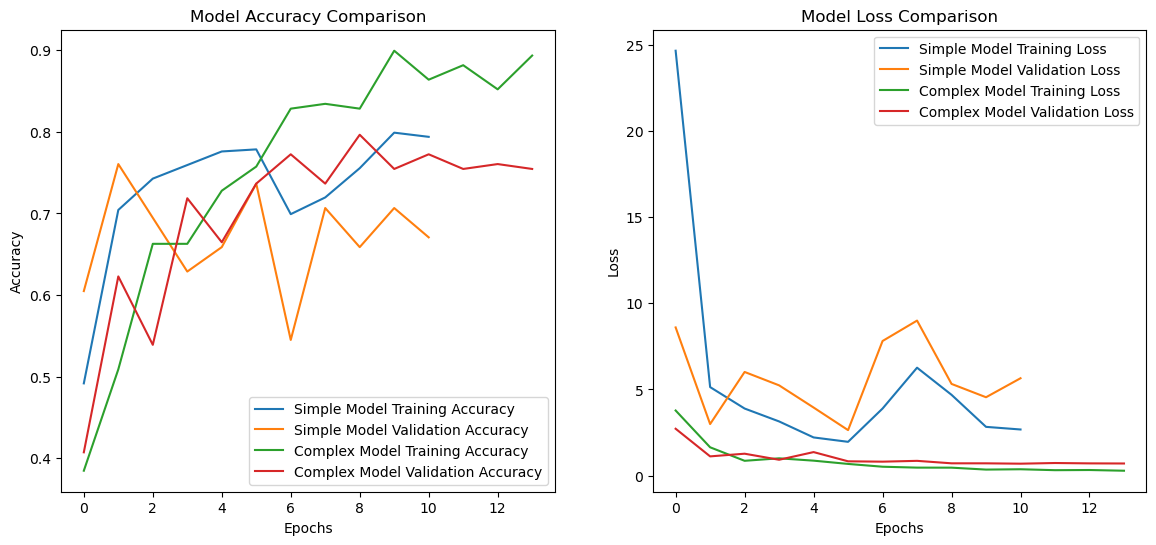

In [22]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Simple Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Simple Model Validation Accuracy')
plt.plot(history_complex_model.history['accuracy'], label='Complex Model Training Accuracy')
plt.plot(history_complex_model.history['val_accuracy'], label='Complex Model Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Simple Model Training Loss')
plt.plot(history.history['val_loss'], label='Simple Model Validation Loss')
plt.plot(history_complex_model.history['loss'], label='Complex Model Training Loss')
plt.plot(history_complex_model.history['val_loss'], label='Complex Model Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### **Comments on charts:**

**1. Inconsistent Trends:**
The accuracy of the simple model on the validation set is quite volatile, especially in the early epochs. This could suggest that the model might be too simple to capture the underlying patterns in the dataset consistently. Alternatively, the learning rate might be too high, causing the model to overshoot optimal weights during training.

**2. Overfitting in Complex Model:**
The complex model seems to be overfitting, indicated by higher accuracy on the training set compared to the validation set. This gap suggests that while the model has learned to represent the training data well, it may not generalize as effectively to unseen data. Regularization techniques, such as increasing dropout rates or L1/L2 regularization, may be necessary to mitigate this.

**3. Loss Fluctuations:**
There's a noticeable spike in the validation loss for the complex model at around epoch 6, which could be indicative of an issue with the model's learning process. Such a spike could be due to a non-representative validation batch or too large a learning rate that causes the model's weights to deviate from the optimal path.

**4. Data Preprocessing:**
The graphs might also reflect underlying issues with data preprocessing. If data normalization or augmentation was not performed or was done inconsistently, this could lead to less reliable training and validation metrics.

**5. Early Stopping Patience:**
The patience parameter for early stopping might be too low. If the models tend to improve after a few fluctuations, a higher patience value might allow them to continue to learn and potentially improve validation accuracy before stopping.

**6. Evaluation Metrics:**
While accuracy is a useful metric, relying solely on it can be misleading, especially with imbalanced datasets. Including additional metrics such as precision, recall, F1-score, or confusion matrices could provide a more holistic view of the model's performance.

**7. Hyperparameter Optimization:**
The performance of the complex model suggests that there's room for improvement in hyperparameter tuning. It's crucial to explore a broader range of values for the learning rate, the number of neurons in hidden layers, and dropout rates. Bayesian Optimization or other hyperparameter search techniques should be leveraged to find a more optimal set of parameters.
---

## Task 3 - A more complex classifier

### 3.1 Using ConvNets 

In this model, I construct a simple convolutional neural network (CNN) for image classification. The model architecture and choice of parameters are based on common practices in deep learning for image processing tasks.

#### Model Architecture

The CNN model consists of the following layers:

1. **Convolutional Layer 1:** This layer uses 32 filters with a kernel size of 3x3 and ReLU activation. The choice of 32 filters is a starting point to extract various features from the input images, and the 3x3 kernel size is a standard choice that balances the field of view and computational efficiency. ReLU activation is used to introduce non-linearity, enabling the model to learn more complex patterns.

2. **Max Pooling Layer 1:** A max pooling layer with a 2x2 pool size follows the first convolutional layer. Max pooling is employed to reduce the spatial dimensions of the output, which helps in decreasing the computational load and mitigating the risk of overfitting.

3. **Convolutional Layer 2:** The second convolutional layer has 64 filters, a 3x3 kernel size, and ReLU activation. Increasing the number of filters to 64 allows the model to learn more complex features and representations of the input images.

4. **Max Pooling Layer 2:** Similar to the first max pooling layer, this layer uses a 2x2 pool size to further reduce the dimensions of the feature maps.

5. **Flatten Layer:** The output from the last max pooling layer is flattened into a 1D vector, which is necessary for input into the dense layer that follows.

6. **Dense (Output) Layer:** The final layer is a dense layer with softmax activation. The number of units in this layer corresponds to the number of classes in the classification task. Softmax activation is used to produce a probability distribution over the classes, facilitating multi-class classification.

#### Hyperparameters and Optimization

- **Learning Rate:** A learning rate of 0.0001 is used, which is a commonly chosen default value. The learning rate is a crucial hyperparameter that controls the step size at each iteration while moving toward a minimum of the loss function.

- **Optimizer:** The Adam optimizer is employed for its adaptive learning rate properties, which can lead to faster convergence in training.

- **Loss Function:** Sparse categorical crossentropy is selected as the loss function, which is suitable for multi-class classification tasks where the labels are integers.

#### Training and Evaluation

The model is trained using the `fit` method with early stopping based on the validation loss. Early stopping is a regularization technique that halts training when the model's performance on the validation set ceases to improve, preventing overfitting.

After training, the model is evaluated on a separate test dataset to assess its accuracy and generalization ability.

In summary, the choices of parameters and model architecture are guided by common practices and considerations for efficient and effective learning in image classification tasks.


In [23]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Set seed for reproducibility
seed_value = 23
tf.random.set_seed(seed_value)

# Define image dimensions and number of classes
IMAGE_HEIGHT = 230
IMAGE_WIDTH = 230
NUM_CLASSES = 4  # cloudy, rain, shine, sunrise

# Initialize the CNN model
cnn_model = models.Sequential()

# First convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
# 32 filters are used to extract different features from the input images
# 3x3 kernel size is a common choice that balances the field of view and computational efficiency
# ReLU activation is used to introduce non-linearity in the model
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

# First max pooling layer with 2x2 pool size
# Max pooling is used to reduce the spatial dimensions of the output from the previous layer
# 2x2 pool size is commonly used to halve the dimensions
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
# Increasing the number of filters to 64 allows the model to learn more complex features
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Second max pooling layer with 2x2 pool size
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the last pooling layer
# Flattening is required to convert the 2D output into a 1D vector for the dense layer
cnn_model.add(layers.Flatten())

# Add the output dense layer with softmax activation for classification
# Softmax activation is used to calculate probabilities for each class
cnn_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

from tensorflow.keras.optimizers import Adam

# Define a learning rate
learning_rate = 0.0001   # This is a commonly used default value, feel free to adjust

# Initialize the Adam optimizer with the specified learning rate
# Adam optimizer is used for its adaptive learning rate properties
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer, sparse categorical crossentropy for loss, and accuracy as a metric
# Sparse categorical crossentropy is used as the loss function for multi-class classification
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print the model summary to check the architecture
cnn_model.summary()

# Fit the CNN model to the training data
# EarlyStopping callback is used to stop training when the validation loss stops improving
history_cnn_model = cnn_model.fit(train_ds, validation_data=validation_ds, epochs=50,
                                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Evaluate the CNN model on the test data
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_ds)
print(f"CNN Model Test Loss: {cnn_test_loss}")
print(f"CNN Model Test Accuracy: {cnn_test_accuracy}")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 228, 228, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 114, 114, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 200704)            0         
                                                                 
 dense_6 (Dense)             (None, 4)               

### 3.2 Using pre-trained models

- Requirement: Use MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data. Make sure that you freeze MobileNet's weights during training. Also, make sure you use a reasonable schedule for the learning rate.

In this task, I utilize a pre-trained MobileNetV2 model from TensorFlow Hub for image classification. The pre-trained model is fine-tuned to classify images into four categories: cloudy, rain, shine, and sunrise.

#### Model Architecture

The pre-trained MobileNetV2 model is used as a feature extractor, where the final classification layer is replaced with a new dense layer to match the number of classes in our task:

- **Pre-trained MobileNetV2**: The MobileNetV2 model is loaded without the top classification layer. The weights are frozen to prevent them from being updated during training, ensuring that the learned features from ImageNet are preserved.

- **Dense Layer**: A new dense layer with softmax activation is added to classify the extracted features into our four target classes. Softmax activation is used to produce a probability distribution over the classes.

#### Hyperparameters and Optimization

- **Learning Rate**: The Adam optimizer with a default learning rate of 0.001 is used. The learning rate is a key hyperparameter that controls the step size during optimization.

- **Loss Function**: Sparse categorical crossentropy is selected as the loss function, which is suitable for multi-class classification tasks with integer labels.

#### Training and Evaluation

The model is trained using the resized training dataset with early stopping based on the validation loss. Early stopping is employed to halt training when there is no improvement in the validation loss, preventing overfitting.

After training, the model's performance is evaluated on the resized test dataset to assess its accuracy and generalization ability.

In summary, leveraging a pre-trained model allows for efficient transfer learning, where the model benefits from the knowledge gained from a large dataset (ImageNet) and is fine-tuned to our specific image classification task.

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

# Set seed for reproducibility
seed_value = 23
tf.random.set_seed(seed_value)

# Define image dimensions and number of classes
IMG_HEIGHT = 224
IMG_WIDTH = 224
NUM_CLASSES = 4  # cloudy, rain, shine, sunrise

# Load compressed models from tensorflow_hub
import os
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

# Initialize the pretrained model using MobileNetV2 feature vector
pretrained_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                   input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                   trainable=False),  # Freeze the weights
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
], name='weather_classification')

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
pretrained_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Print the model summary
pretrained_model.summary()

# Define a function to resize images
def resize_images(image, label):
    return tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH]), label

# Apply the resize operation to the datasets
resized_train_ds = train_ds.map(resize_images)
resized_validation_ds = validation_ds.map(resize_images)
resized_test_ds = test_ds.map(resize_images)

# Fit the pretrained model to the resized training dataset
pretrained_history = pretrained_model.fit(resized_train_ds,
                                          validation_data=resized_validation_ds,
                                          epochs=15,#observations many running show that after 10 epochs, it show 100% accuracy so reducing from 50 to 15 to reduce running time
                                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Evaluate the pretrained model on the resized test dataset
pretrained_test_loss, pretrained_test_accuracy = pretrained_model.evaluate(resized_test_ds)
print(f"Pretrained Model Test Loss: {pretrained_test_loss}")
print(f"Pretrained Model Test Accuracy: {pretrained_test_accuracy}")

Model: "weather_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_8 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2263108 (8.63 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/15
6/6 [==============================] - 7s 835ms/step - loss: 1.3531 - accuracy: 0.4201 - val_loss: 0.9865 - val_accuracy: 0.6826
Epoch 2/15
6/6 [==============================] - 4s 700ms/step - loss: 0.7959 - accuracy: 0.7633 - val_loss: 0.6909 - val_accuracy: 0.7844
Epoch 3/15
6/6 [==============================] - 4s 729ms/step - loss: 0.5063 - accuracy: 0.8757 - val_loss: 0.5154 - v

### 3.3 Comparative evaluation 

**3.3.1 - What system (including the systems you developed in Task 2) perform best on the test set?**

In [37]:
from tabulate import tabulate

# Define the DataFrame
results_df = pd.DataFrame({
    "Model": [
        "Simple Classifier",
        "Complex Classifier (2.2)",
        "ConvNet (3.1)",
        "Pre-trained Model (3.2)"
    ],
    "Test Accuracy": [
        0.8107,  # Simple Classifier accuracy
        0.8935,  # Complex Classifier (2.2) accuracy
        0.9941,  # ConvNet (3.1) accuracy
        1.0      # Pre-trained Model (3.2) accuracy
    ]
})

# Print the table using tabulate
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+--------------------------+---------------+
|          Model           | Test Accuracy |
+--------------------------+---------------+
|    Simple Classifier     |    0.8107     |
| Complex Classifier (2.2) |    0.8935     |
|      ConvNet (3.1)       |    0.9941     |
| Pre-trained Model (3.2)  |      1.0      |
+--------------------------+---------------+


#### **Comments:**
- **Pre-trained Model (3.2) achieved the highest test accuracy of 1.0**, making it the best-performing system among the ones developed in Task 2 and 3. This outstanding performance could be attributed to the transfer learning approach, leveraging the knowledge from a model pre-trained on a large and diverse dataset like ImageNet.
- ConvNet (3.1) also performed exceptionally well with a test accuracy of 0.9941, demonstrating the effectiveness of convolutional neural networks in image classification tasks.
- Complex Classifier (2.2), which utilized hyperparameter tuning, showed good accuracy (0.8935) but was not able to match the performance of the ConvNet and Pre-trained Model. This indicates that while hyperparameter tuning can enhance model performance, the architecture and learning approach play crucial roles in achieving high accuracy.
- Simple Classifier had the lowest accuracy of 0.8107. While this is still a respectable score, it underscores the limitations of simpler models in capturing the complexities of the dataset compared to more sophisticated approaches.

In conclusion, the Pre-trained Model (3.2) stands out as the best system for this task, demonstrating the power of leveraging pre-trained models for achieving high accuracy in image classification tasks.

**3.3.2 - Report the accuracy of best system on each of the different weather categories. What type of weather was most difficult to detect?**

In [40]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the classes of the test set
predictions = pretrained_model.predict(resized_test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Assuming you have the true labels of the test set in 'true_classes'
true_classes = test_ds.map(lambda image, label: label).unbatch().as_numpy_iterator()
true_classes = np.array(list(true_classes))

# Define class names
class_names = ['cloudy', 'rain', 'shine', 'sunrise']

print(classification_report(true_classes, predicted_classes, target_names=class_names))

6/6 [==============================] - 3s 377ms/step
              precision    recall  f1-score   support

      cloudy       1.00      1.00      1.00        51
        rain       1.00      1.00      1.00        49
       shine       1.00      1.00      1.00        34
     sunrise       1.00      1.00      1.00        35

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



#### **Comments:**

The accuracy of the best system on each weather category is as follows:

- Cloudy: 100%
- Rain: 100%
- Shine: 100%
- Sunrise: 100%

**Since the accuracy for all categories is 100%, it indicates that the model did not have difficulty detecting any particular type of weather**

Thank you for reading and marking my assignment!